# 라이브러리 로딩

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글이 깨지는 문제
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 한글 적용 후 기호가 미출력
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 주제 : 서울시 공공 자전거 대여 분석
- 자료 출처 : https://data.seoul.go.kr/
- 비정제 자료 : uci https://archive.ics.uci.edu/ml/datasets.php

## 1. Data Definition

In [22]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [2]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [9]:
##### quiz1. 시간대별로 평균 몇대가 대여되었을까?

bike.groupby("Hour")[["Rented Bike Count"]].mean()

,Rented Bike Count
Hour,
0,541.460274
1,426.183562
2,301.630137
3,203.331507
4,132.591781
5,139.082192
6,287.564384
7,606.005479
8,1015.701370


Text(16, 150, '퇴근')

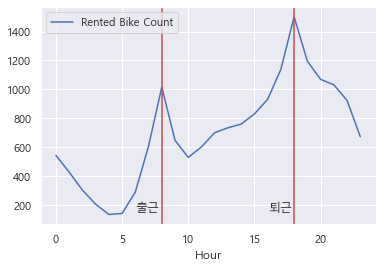

In [21]:
##### quiz1 시각화
bike.groupby("Hour")[["Rented Bike Count"]].mean().plot() # python 기본 그래프는 선그래프

plt.axvline(x=8, color="r") # 수직으로 선을 그어 x축의 값을 강조
plt.axvline(x=18, color="r")

plt.text(6, 150, "출근") # 그래프에 글 쓰기
plt.text(16, 150, "퇴근")

In [27]:
##### 요일별로 평균 몇대가 대여되었을까?

#  Date 변수에서 요일을 뽑아 파생변수 생성
## 2016년 1월 1일은 금요일

bike["Date"] = pd.to_datetime(bike["Date"], format="%d/%m/%Y") # 일 월 연
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [45]:
diff = bike["Date"] - pd.to_datetime("2016-1-1")
diff = diff.astype(str)
diff_num = diff.str.split(" ", expand=True)[0].astype(int) 
# ['700' 'days']라고 나오던 것을 확장된 것이라고 알려줘서 700만 뽑고 결과를 int로 변경

In [46]:
# 나머지 0 : 금, 1 : 토, 2 : 일, 3 : 월, 4 : 화, 5 : 수, 6 : 목
def weekdays(x):
    if x%7 == 0: 
        return "금요일"
    elif x%7 == 1:
        return "토요일"
    elif x%7 == 2:
        return "일요일"
    elif x%7 == 3:
        return "월요일"
    elif x%7 == 4:
        return "화요일"
    elif x%7 == 5:
        return "수요일"
    elif x%7 == 6:
        return "목요일"
    
bike["weekdays"] = diff_num.apply(weekdays)
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일


In [55]:
bike.groupby("weekdays")[["Rented Bike Count"]].mean()

,Rented Bike Count
weekdays,
금요일,747.117925
목요일,690.704327
수요일,740.349359
월요일,730.563301
일요일,625.155449
토요일,709.528846
화요일,687.977564


In [61]:
bike["weekdays2"] = ((pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime("2016-1-1")).dt.days)%7 
# dt : datetype/ days : 날짜에 해당하는 숫자만 추출
bike["weekdays2"] = bike["weekdays2"].map({0:"금요일", 1:"토요일", 2:"일요일", 3:"월요일", 4:"화요일", 5:"수요일", 6:"목요일"})
bike.groupby("weekdays")[["Rented Bike Count"]].mean()

,Rented Bike Count
weekdays,
금요일,747.117925
목요일,690.704327
수요일,740.349359
월요일,730.563301
일요일,625.155449
토요일,709.528846
화요일,687.977564


<AxesSubplot:xlabel='weekdays'>

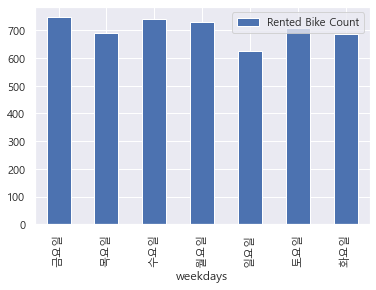

In [80]:
bike.groupby("weekdays")[["Rented Bike Count"]].mean().plot(kind="bar")

In [66]:
?bike.plot

<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

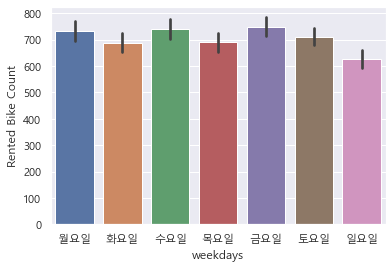

In [86]:
sns.barplot(x="weekdays", y="Rented Bike Count", data=bike,
           order=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])

C:\Users\thdwl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thdwl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thdwl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thdwl\anacond

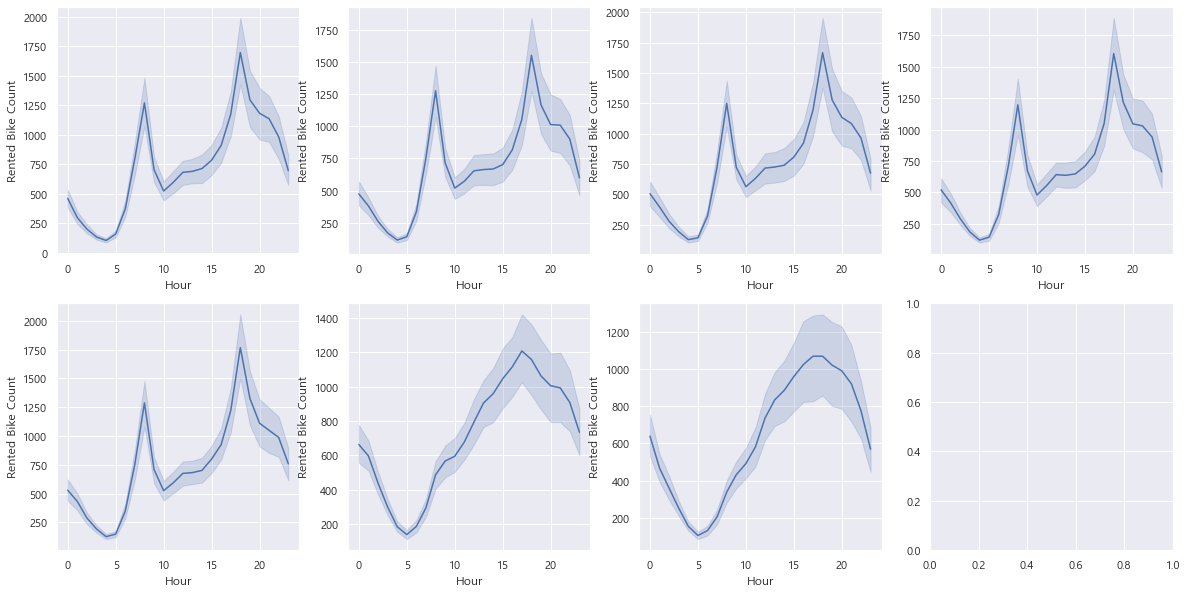

In [84]:
# 요일별, 시간대별로 그래프 시각화 : 요일별로 시간대 그래프 7개 그림

# 환 곳에 7개 그래프

_, axes= plt.subplots(2, 4, figsize=(20, 10)) # 서브플롯7 사용시 이거 잗동

w_list = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]
for i in range(7):
    sns.lineplot("Hour", "Rented Bike Count", data=bike.loc[bike["weekdays"]==w_list[i]],
                ax = axes[i//4, i%4])

In [85]:
axes # 2행 4열

array([[<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>],
       [<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:>]], dtype=object)